# Task 1: Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [13]:
def generate_examples(num= 1000):
    W = [1.0, -3.0]
    b = 1.0

    W = np.reshape(W, (2, 1))

    X = np.random.randn(num, 2)

    y = b + np.dot(X, W) + np.random.randn()

    y = np.reshape(y, (num, 1))

    return X, y




In [14]:
X, y = generate_examples()

In [15]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [16]:
y[0:5]

array([[ 0.26227432],
       [-0.19072516],
       [ 0.06147185],
       [-0.10042853],
       [ 2.28669636]])

In [6]:
print(X[0], y[0])

[-0.50261138  0.13842286] [0.08212005]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [22]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn

In [23]:
model = Model(2)

print(model.W)
print(model.b)

[[0.48829434]
 [0.36409723]]
<built-in method randn of numpy.random.mtrand.RandomState object at 0x00000182C5044B40>


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [28]:
class Model():
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [31]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [-0.67238147]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [33]:
class Model():
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [39]:
model = Model(2)

y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

loss

3.833882830381678

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [43]:
class Model():
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])
    def backward_pass(self, X, y_hat, y_true):
        m = y_hat.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dw = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
        return dw, db


In [46]:
model = Model(2)

X, y = generate_examples()
y_hat = model.forward_pass(X)

dw, db = model.backward_pass(X, y, y_hat)
dw, db

(array([-1.35737123, -3.1069922 ]), 0.2574034481625509)

# Task 7: Update Parameters

In [95]:
class Model():
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])
    def backward_pass(self, X, y_hat, y_true):
        m = y_hat.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dw = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
        return dw, db
    def update_params(self, dw, db, lr):
        self.W = self.W - lr * np.reshape(dw, (self.num_features, 1))  # Corrected from self.w to self.W
        self.b = self.b - lr * db

# Task 8: Training Loop

In [121]:
class Model():
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])
    def backward_pass(self, X, y_hat, y_true):
        m = y_hat.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dw = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
        return dw, db
    def update_params(self, dw, db, lr):
        self.W = self.W - lr * np.reshape(dw, (self.num_features, 1))  # Corrected from self.w to self.W
        self.b = self.b - lr * db
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dw, db = self.backward_pass(x_train, y_hat, y_train)
            self.update_params(dw, db, lr)
            losses.append(loss)
            if i % (iterations // 10) == 0:
                print(f'Iter: {i}, Loss: {loss:.4f}')
            # # Example of dynamic learning rate adjustment
            # if i % 100 == 0 and i > 0:
            #     lr *= 0.9  # Reduce learning rate by 10%
        return losses

In [122]:
model = Model(2)

In [123]:
x_train, y_train = generate_examples()

In [124]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 5.3959
Iter: 100, Loss: 2.9043
Iter: 200, Loss: 1.5633
Iter: 300, Loss: 0.8416
Iter: 400, Loss: 0.4531
Iter: 500, Loss: 0.2439
Iter: 600, Loss: 0.1313
Iter: 700, Loss: 0.0707
Iter: 800, Loss: 0.0381
Iter: 900, Loss: 0.0205


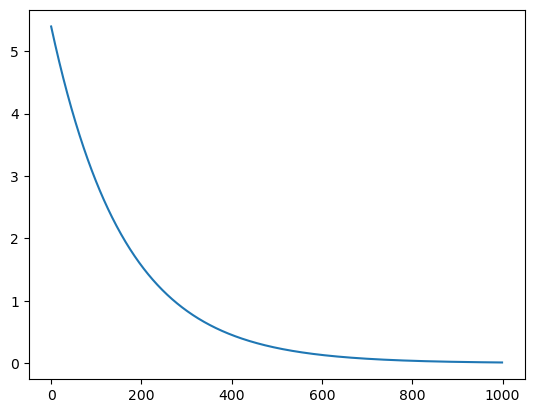

In [125]:
plt.plot(losses);

# Task 9: Predictions

In [140]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)

print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [141]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

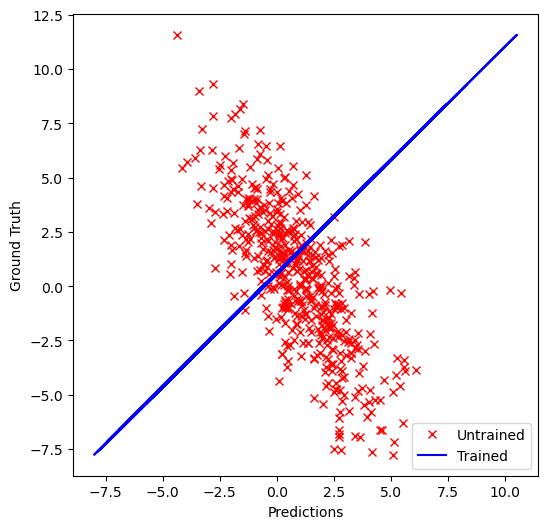

In [142]:
plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, 'rx', label= 'Untrained')
plt.plot(preds_trained, y_test, 'b', label= 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()